<a href="https://colab.research.google.com/github/jbychang/google_colab/blob/main/2022_02_20_image_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Init

In [1]:
!pip install pystackreg imagecodecs stackview pyclesperanto_prototype ipycanvas==0.11 
# import napari
# napari.Viewer()
# import cellpose
import numpy as np
import pandas as pd
import os
from skimage.io import imread 
from skimage import transform, exposure
import skimage.io
import doctest
import numpy
import pystackreg
import cv2
import skimage.util as sku
import h5py
import plotly.express as px
from skimage import (
    data, restoration, util 
)
from google.colab import files

from matplotlib import pyplot as plt
# stackview code from https://colab.research.google.com/github/haesleinhuepf/stackview/blob/master/docs/colab_clesperanto_demo.ipynb#scrollTo=2ed3eebe-57f2-41aa-9060-48971bde8383
import stackview
import pyclesperanto_prototype as cle
# Activate widgets in google colab
from google.colab import output
output.enable_custom_widget_manager()
# install pyimagej as in https://pyimagej.readthedocs.io/en/latest/Install.html#dynamic-installation-within-google-colab
!pip install -q condacolab
import condacolab
condacolab.install()
import condacolab
condacolab.check()
!mamba install pyimagej openjdk=8
!wget https://downloads.imagej.net/fiji/latest/fiji-linux64.zip > /dev/null && unzip -o fiji-linux64.zip > /dev/null
!rm fiji-linux64.zip
# !wget https://imagej.nih.gov/ij/plugins/download/Filter_Rank.class > /dev/null
# !mv Filter_Rank.class Fiji.app/plugins
# !wget https://sites.imagej.net/Ilastik/plugins/ilastik4ij-1.8.3-SNAPSHOT.jar-20220920171722 > /dev/null
# !mv ilastik4ij-1.8.3-SNAPSHOT.jar-20220920171722 /content/Fiji.app/plugins/ilastik4ij-1.8.3-SNAPSHOT.jar
import os
os.environ['JAVA_HOME']='/usr/local'
# ij = imagej.init('sc.fiji:fiji:2.5.0')
import imagej
ij = imagej.init("/content/Fiji.app")

from google.colab import drive
drive.mount('/content/drive')

RAW_IMAGE_DIR = '/content/drive/MyDrive/Chendi/2022_09_images/raw_images'
OUTPUT_DIR = '/content/drive/MyDrive/Chendi/2022_09_images/processed_images'

# set up parameters to load images
FRAME_NAMES = ['00d00h00m', '00d01h00m', '00d02h00m', '00d03h00m', '00d04h00m', '00d05h00m', '00d06h00m', '00d07h00m', '00d08h00m', '00d09h00m', '00d10h00m', '00d11h00m', '00d12h00m', '00d13h00m', '00d14h00m', '00d15h00m', '00d16h00m', '00d17h00m', '00d18h00m', '00d19h00m', '00d20h00m', '00d21h00m', '00d22h00m', '00d23h00m', '01d00h00m', '01d01h00m', '01d02h00m', '01d03h00m', '01d04h00m', '01d05h00m', '01d06h00m', '01d07h00m', '01d08h00m', '01d09h00m', '01d10h00m', '01d11h00m', '01d12h00m', '01d13h00m', '01d14h00m', '01d15h00m', '01d16h00m', '01d17h00m', '01d18h00m', '01d19h00m', '01d20h00m', '01d21h00m', '01d22h00m', '01d23h00m', '02d00h00m', '02d01h00m', '02d02h00m', '02d03h00m', '02d04h00m', '02d05h00m', '02d06h00m', '02d07h00m', '02d08h00m', '02d09h00m', '02d10h00m', '02d11h00m', '02d12h00m']
IMAGE_PREFIX = 'H358_combo_'
CHANNELS = ['green', 'orange', 'NIR']
WELLS = ['D8']
SITES = ['1']



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 842.8/842.8 KB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.2/36.2 MB 39.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 608.3/608.3 KB 52.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.8/255.8 KB 29.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.5/130.5 KB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 917.9/917.9 KB 61.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 69.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.6/74.6 KB 8.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 77.2 MB/s eta 0:00:00
  Created wheel for transforms3d: filename=transforms3d-0.4.1-py3-none-any.whl size=1376772 sha

In [ ]:
# !ls /content/Fiji.app/plugins

In [ ]:
# ij.getVersion()

'2.9.0/1.53t'

In [ ]:
# ij.IJ.run("Export HDF5", "select=/Users/jeremychang/Desktop/test2.h5 exportpath=/Users/jeremychang/Desktop/test2.h5 datasetname=data compressionlevel=0 input=D10_1_all_channels_all_timepoints_logseq_colors_reg_bgsub_crop.tif")

In [ ]:
# imp = ij.IJ.openImage("http://imagej.net/images/blobs.gif")
# ij.py.run_plugin("Filter Rank", {"window": 3, "randomise": True}, imp=imp)
# ij.IJ.resetMinAndMax(imp)
# ij.py.run_plugin("Enhance Contrast", {"saturated": 0.35}, imp=imp)

In [ ]:
# # install pyimagej based on https://forum.image.sc/t/pyimagej-on-google-colab/32804

# def install_java():
#   !apt-get install -y openjdk-8-jdk-headless -qq > /dev/null      #install openjdk
#   os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"     #set environment variable
#   !java -version       #check java version
# install_java()
# !sudo apt-get install maven
# !pip install Cython pyimagej
# !wget https://anaconda.org/conda-forge/pyjnius/1.2.0/download/osx-64/pyjnius-1.2.0-py37h90b5fae_0.tar.bz2 && tar -xjf pyjnius-1.2.0-py37h90b5fae_0.tar.bz2 -C /usr/local
# # set env
# os.environ["PYJNIUS_JAR"] = "/usr/local/share/pyjnius/pyjnius.jar"

In [ ]:
# import imagej;
# ij = imagej.init()
# print(ij.getVersion())

In [ ]:
# # check which GPU we are using
# cle.get_device()

In [ ]:
# url = 'https://www.fi.edu/sites/fi.live.franklinds.webair.com/files/styles/featured_large/public/General_EduRes_Heart_BloodVessels_0.jpg'
# img = imread(url)
# # img = np.mean(img, axis=2)
# ij.py.show(img)

# Load images

In [2]:
# helper function to read images

def read_image(channel, frame, well, site):
  """
  reads in images based on channel/frame/well/site
  note that this function converts the images to grayscale 64-bit float (input images from Chendi are RGB). images are scaled based on https://github.com/scikit-image/scikit-image/blob/00177e14097237ef20ed3141ed454bc81b308f82/skimage/color/colorconv.py#L835
  """
  frameToFrameName = dict(zip(range(0, len(FRAME_NAMES)), FRAME_NAMES))
  frame_name = frameToFrameName[frame]
  return imread(os.path.join(RAW_IMAGE_DIR,f'{IMAGE_PREFIX}{channel}_{well}_{str(site)}_{frame_name}.tif'), as_gray=True)

In [3]:
# loads as a list of images and concatenates images into ImageCollection

images = skimage.io.concatenate_images([
    skimage.io.concatenate_images(
        [read_image(channel, frame, WELLS[0], SITES[0]) for channel in CHANNELS]) 
    for frame in range(len(FRAME_NAMES)-1)])


In [ ]:
# img = read_image('orange', 1, 'D8', 1)

In [ ]:
images.shape

(60, 3, 1040, 1408)

In [ ]:
images_c1 = images[:,0,:,:]

# Image registration

In [ ]:
# note, skipping pre-registration
images2 = images.copy()
reg_channel = images[:,0,:,:]
sr = pystackreg.StackReg(pystackreg.StackReg.RIGID_BODY)
tmat2 = sr.register_stack(reg_channel, axis=0, reference='previous', verbose=True)
for channel in range(len(CHANNELS)):
    images[:, channel, :, :] = sr.transform_stack(images[:, channel, :, :])

100%|██████████| 59/59 [01:46<00:00,  1.81s/it]


In [ ]:
images_c1b = images[:,0,:,:]

In [ ]:
skimage.io.imsave(os.path.join(OUTPUT_DIR,'temp.tif'),images_c1b)

In [ ]:
# files.download('temp.tif')


In [ ]:
# run("Descriptor-based series registration (2d/3d + t)", "series_of_images=raw_images brightness_of=[Interactive ...] approximate_size=[Interactive ...] type_of_detections=[Interactive ...] subpixel_localization=[3-dimensional quadratic fit] transformation_model=[Rigid (2d)] number_of_neighbors=3 redundancy=1 significance=3 allowed_error_for_ransac=5 global_optimization=[All-to-all matching with range ('reasonable' global optimization)] range=3 choose_registration_channel=1 image=[Fuse and display] interpolation=[Linear Interpolation]")
# run("Descriptor-based series registration (2d/3d + t)", "series_of_images=[[XYCTZ] raw_images] brightness_of=Low approximate_size=[6 px] type_of_detections=[Maxima only] subpixel_localization=[3-dimensional quadratic fit] transformation_model=[Rigid (2d)] number_of_neighbors=3 redundancy=1 significance=3 allowed_error_for_ransac=5 global_optimization=[All-to-all matching with range ('reasonable' global optimization)] range=3 choose_registration_channel=1 image=[Fuse and display] interpolation=[Linear Interpolation]")


## Crop black space

In [ ]:
xmin = round(np.amin(tmat2[:,0,2]))
xmax = round(np.amax(tmat2[:,0,2]))
ymin = round(np.amin(tmat2[:,1,2]))
ymax = round(np.amax(tmat2[:,1,2]))
print(xmin, xmax, ymin, ymax)

xshift = 0
yshift = 0

In [ ]:
images  = images[:,:,0-ymin-yshift:1040-ymax, 0-xmin+xshift:1408-xmax]

In [ ]:
images_c1b_cropped = images[:,0,:,:]

In [ ]:
skimage.io.imsave(os.path.join(OUTPUT_DIR,'images_c2b_cropped.tif'),images_c1b_cropped)

# Bgsub

## ImageJ-based background subtraction

In [ ]:
# convert images to 8 bit

images3 = skimage.util.img_as_ubyte(images)
def imagej_bgsub(images: 'stack of 8-bit images'):
  # do bgsub for each channel and recombine

attempt imagej bgsub

In [ ]:
images3 = skimage.util.img_as_ubyte(images)

In [ ]:
images3

array([[[[31, 31, 32, ..., 28, 29, 29],
         [33, 33, 30, ..., 25, 29, 28],
         [36, 34, 26, ..., 26, 29, 27],
         ...,
         [19, 28, 29, ..., 21, 16, 16],
         [21, 25, 29, ..., 19, 24, 23],
         [28, 20, 23, ..., 24, 24, 20]],

        [[ 5,  5,  5, ...,  5,  5,  5],
         [ 6,  5,  5, ...,  5,  5,  4],
         [ 6,  7,  5, ...,  4,  4,  4],
         ...,
         [ 5,  5,  5, ...,  6,  5,  5],
         [ 5,  5,  5, ...,  5,  4,  5],
         [ 5,  7,  5, ...,  4,  5,  5]],

        [[27, 14, 12, ..., 10, 10, 23],
         [19, 36, 26, ..., 15, 10, 16],
         [20, 17, 20, ..., 10, 12, 10],
         ...,
         [ 0, 11,  7, ...,  0,  0,  0],
         [13,  0,  7, ...,  0,  6,  0],
         [11, 18, 14, ...,  0,  0,  0]]],


       [[[26, 31, 28, ..., 25, 24, 33],
         [24, 29, 22, ..., 24, 30, 28],
         [31, 25, 28, ..., 30, 27, 26],
         ...,
         [21, 26, 24, ..., 29, 25, 23],
         [27, 20, 27, ..., 23, 21, 23],
         [23, 16

In [ ]:
images3.shape

(60, 3, 1040, 1408)

In [ ]:
images3_c1 = images3[:,0,:,:]
skimage.io.imsave(os.path.join(OUTPUT_DIR,'images_c1.tif'),images3_c1)

with xarray—THIS WORKS, although doesn't seem to work for the blue channel

In [ ]:
import xarray

In [ ]:
ximg = xarray.DataArray(images3, name='images3', dims=('t', 'ch', 'row', 'col'))

In [ ]:
ximg

<xarray.DataArray 'images3' (t: 60, ch: 3, row: 1040, col: 1408)>
array([[[[ 1,  2,  3, ...,  4,  4,  3],
         [ 3,  4,  1, ...,  1,  4,  2],
         [ 6,  4,  0, ...,  2,  4,  2],
         ...,
         [ 0,  6,  7, ...,  1,  0,  0],
         [ 0,  3,  7, ...,  0,  4,  3],
         [ 6,  0,  1, ...,  4,  4,  0]],

        [[ 5,  5,  5, ...,  5,  5,  5],
         [ 6,  5,  5, ...,  5,  5,  4],
         [ 6,  7,  5, ...,  4,  4,  4],
         ...,
         [ 5,  5,  5, ...,  6,  5,  5],
         [ 5,  5,  5, ...,  5,  4,  5],
         [ 5,  7,  5, ...,  4,  5,  5]],

        [[27, 14, 12, ..., 10, 10, 23],
         [19, 36, 26, ..., 15, 10, 16],
         [20, 17, 20, ..., 10, 12, 10],
         ...,
...
         ...,
         [40, 31, 45, ..., 36, 49, 33],
         [36, 49, 47, ..., 44, 31, 47],
         [38, 36, 44, ..., 44, 45, 38]],

        [[ 4,  5,  5, ...,  5,  5,  5],
         [ 5,  6,  5, ...,  5,  5,  6],
         [ 5,  6,  5, ...,  5,  5,  5],
         ...,
         [ 5,  7,  4, ...,  6,  6,  5],
         [ 5,  5,  6, ...,  6,  6,  4],
         [ 5,  4,  5, ...,  5,  5,  4]],

        [[ 9, 10,  9, ...,  9,  9,  9],
         [10, 10,  9, ...,  9,  8,  9],
         [10,  9,  9, ...,  9,  9,  9],
         ...,
         [ 9,  8,  9, ...,  6,  7,  7],
         [ 9,  9,  9, ...,  8,  9,  7],
         [ 9,  9,  9, ...,  7,  7,  7]]]], dtype=uint8)
Dimensions without coordinates: t, ch, row, col

In [ ]:
ximg[0,0,:,10]

<xarray.DataArray 'images3' (row: 1040)>
array([31, 29, 30, ..., 24, 24, 28], dtype=uint8)
Dimensions without coordinates: row

In [ ]:
jimg = ij.py.to_java(ximg)

In [ ]:
jimg.getChannels

<java bound method 'getChannels' of 'net.imagej.Dataset'>

In [ ]:
jimp = ij.py.to_imageplus(ximg)

In [ ]:
ij.IJ.run(jimp, "Subtract Background...", "rolling=50 stack")

In [ ]:

stack = jimp.getStack();
stack.setPixels(jimp.getProcessor().getPixels(), jimp.getCurrentSlice());

In [ ]:
from_java3 = ij.py.from_java(jimp)

In [ ]:
from_java3

<xarray.DataArray 'images3' (t: 60, row: 1040, col: 1408, ch: 3)>
array([[[[ 1,  5, 27],
         [ 2,  5, 14],
         [ 3,  5, 12],
         ...,
         [ 4,  5, 10],
         [ 4,  5, 10],
         [ 3,  5, 23]],

        [[ 3,  6, 19],
         [ 4,  5, 36],
         [ 1,  5, 26],
         ...,
         [ 1,  5, 15],
         [ 4,  5, 10],
         [ 2,  4, 16]],

        [[ 6,  6, 20],
         [ 4,  7, 17],
         [ 0,  5, 20],
         ...,
...
         ...,
         [36,  6,  6],
         [49,  6,  7],
         [33,  5,  7]],

        [[36,  5,  9],
         [49,  5,  9],
         [47,  6,  9],
         ...,
         [44,  6,  8],
         [31,  6,  9],
         [47,  4,  7]],

        [[38,  5,  9],
         [36,  4,  9],
         [44,  5,  9],
         ...,
         [44,  5,  7],
         [45,  5,  7],
         [38,  4,  7]]]], dtype=uint8)
Coordinates:
  * t        (t) float64 0.0 1.0 2.0 3.0 4.0 5.0 ... 55.0 56.0 57.0 58.0 59.0
  * row      (row) float64 0.0 1.0 2.0 3.0 ... 1.037e+03 1.038e+03 1.039e+03
  * col      (col) float64 0.0 1.0 2.0 3.0 ... 1.405e+03 1.406e+03 1.407e+03
  * ch       (ch) float64 0.0 1.0 2.0

In [ ]:
from_java3[0,:,10,0]

<xarray.DataArray 'images3' (row: 1040)>
array([2, 0, 1, ..., 2, 2, 6], dtype=uint8)
Coordinates:
    t        float64 0.0
  * row      (row) float64 0.0 1.0 2.0 3.0 ... 1.037e+03 1.038e+03 1.039e+03
    col      float64 10.0
    ch       float64 0.0

In [ ]:
# bg_images = from_java3[:,:,:,0]
skimage.io.imsave(os.path.join(OUTPUT_DIR,'images_bgsub4.tif'),from_java3)

xarray with one slice

In [ ]:
ximg = xarray.DataArray(images3[0,0,:,:], name='ximg', dims=('row', 'col'))

In [ ]:
ximg

<xarray.DataArray 'ximg' (row: 1040, col: 1408)>
array([[31, 31, 32, ..., 28, 29, 29],
       [33, 33, 30, ..., 25, 29, 28],
       [36, 34, 26, ..., 26, 29, 27],
       ...,
       [19, 28, 29, ..., 21, 16, 16],
       [21, 25, 29, ..., 19, 24, 23],
       [28, 20, 23, ..., 24, 24, 20]], dtype=uint8)
Dimensions without coordinates: row, col

In [ ]:
jimp = ij.py.to_imageplus(ximg)

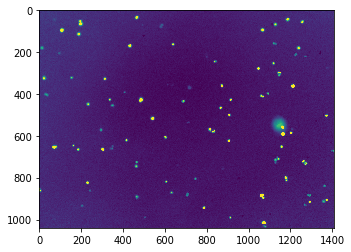

In [ ]:
ij.py.show(jimp)

In [ ]:
ij.IJ.run(jimp, "Subtract Background...", "rolling=50 stack")

In [ ]:
# based on https://github.com/imagej/pyimagej/issues/51#issuecomment-586594490

stack = jimp.getStack();
stack.setPixels(jimp.getProcessor().getPixels(), jimp.getCurrentSlice());

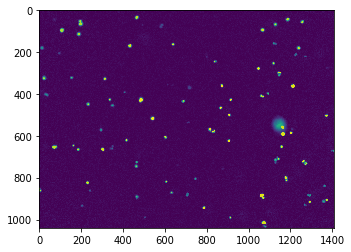

In [ ]:
ij.py.show(jimp)

attempt 1

In [ ]:
jimages = ij.py.to_imageplus(images3)
# jimages = ij.py.to_java(images3)

In [ ]:
ij.IJ.run(jimages, "Subtract Background...", "rolling=50 stack")

In [ ]:
from_java = ij.py.from_java(jimages)

In [ ]:
from_java

<xarray.DataArray (dim_0: 60, dim_1: 3, dim_2: 1040, dim_3: 1408)>
array([[[[31, 31, 32, ..., 28, 29, 29],
         [33, 33, 30, ..., 25, 29, 28],
         [36, 34, 26, ..., 26, 29, 27],
         ...,
         [19, 28, 29, ..., 21, 16, 16],
         [21, 25, 29, ..., 19, 24, 23],
         [28, 20, 23, ..., 24, 24, 20]],

        [[ 5,  5,  5, ...,  5,  5,  5],
         [ 6,  5,  5, ...,  5,  5,  4],
         [ 6,  7,  5, ...,  4,  4,  4],
         ...,
         [ 5,  5,  5, ...,  6,  5,  5],
         [ 5,  5,  5, ...,  5,  4,  5],
         [ 5,  7,  5, ...,  4,  5,  5]],

        [[27, 14, 12, ..., 10, 10, 23],
         [19, 36, 26, ..., 15, 10, 16],
         [20, 17, 20, ..., 10, 12, 10],
         ...,
...
         ...,
         [40, 31, 45, ..., 36, 49, 33],
         [36, 49, 47, ..., 44, 31, 47],
         [38, 36, 44, ..., 44, 45, 38]],

        [[ 4,  5,  5, ...,  5,  5,  5],
         [ 5,  6,  5, ...,  5,  5,  6],
         [ 5,  6,  5, ...,  5,  5,  5],
         ...,
         [ 5,  7,  4, ...,  6,  6,  5],
         [ 5,  5,  6, ...,  6,  6,  4],
         [ 5,  4,  5, ...,  5,  5,  4]],

        [[ 9, 10,  9, ...,  9,  9,  9],
         [10, 10,  9, ...,  9,  8,  9],
         [10,  9,  9, ...,  9,  9,  9],
         ...,
         [ 9,  8,  9, ...,  6,  7,  7],
         [ 9,  9,  9, ...,  8,  9,  7],
         [ 9,  9,  9, ...,  7,  7,  7]]]], dtype=uint8)
Coordinates:
  * dim_0    (dim_0) float64 0.0 1.0 2.0 3.0 4.0 ... 55.0 56.0 57.0 58.0 59.0
  * dim_1    (dim_1) float64 0.0 1.0 2.0
  * dim_2    (dim_2) float64 0.0 1.0 2.0 3.0 ... 1.037e+03 1.038e+03 1.039e+03
  * dim_3    (dim_3) float64 0.0 1.0 2.0 3.0 ... 1.405e+03 1.406e+03 1.407e+03

In [ ]:
from_java.shape

(60, 3, 1040, 1408)

In [ ]:
bg_images = from_java[:,0,:,:]
skimage.io.imsave(os.path.join(OUTPUT_DIR,'images_bgsub2.tif'),bg_images)

skimage bgsub

In [ ]:
radius = 200
normalized_radius = radius / 255
kernel = restoration.ellipsoid_kernel(
    (radius * 2, radius * 2),
    normalized_radius * 2
)

sigma=4


# smoothed = skimage.filters.gaussian(img, sigma=sigma, preserve_range=True)
# background = restoration.rolling_ball(smoothed, kernel=kernel)



for i_img in range(images.shape[0]): 
    for channel in range(len(CHANNELS)):
        img = images[i_img,channel,:,:]
        smoothed = skimage.filters.gaussian(img, sigma=sigma, preserve_range=True)
        background = restoration.rolling_ball(smoothed, kernel=kernel)
        images[i_img,channel,:,:] = img - background

In [ ]:
images_c1b_cropped_bgsub = images[:,0,:,:]

In [ ]:
skimage.io.imsave(os.path.join(OUTPUT_DIR,'images_c2b_cropped_bgsub.tif'),images_c1b_cropped_bgsub)

# Try to save images to HDF5

In [ ]:
f = h5py.File(os.path.join(OUTPUT_DIR,'test_2.h5'), "a")

In [ ]:
images.shape

(60, 3, 1040, 1408)

In [ ]:
np.amax(images[0,0,:,:])

0.7154000401496887

In [ ]:
images_8b = skimage.util.img_as_ubyte(images)

In [ ]:
np.amax(images_8b)

202

In [ ]:
!conda install -c conda-forge vigra


In [ ]:
import vigra

In [ ]:
axistags = vigra.defaultAxistags("tcyx")


In [ ]:
# https://github.com/ilastik/ilastik/blob/70d128ac80f0a89befd80e554ad3f7578ec55a41/notebooks/h5convert/convert_to_h5.ipynb
ds = f.create_dataset(name = 'dataset', data=images_8b, chunks = (1, 1, 256, 256))
ds.attrs["axistags"] = axistags.toJSON()
f.close()



Looks like I can successfully save images to Ilastik HDF5 format now!!!!!!!

Next steps:
* figure out background subtraction
* start processing batched images
* try to automate running ilastik, but this isn't strictly necessary

In [ ]:
f.close()

# Propagate changes to drive

In [ ]:
# make changes visible in Drive

drive.flush_and_unmount()
print('All changes made in this colab session should now be visible in Drive.')